# Examing the Robustness of Transfer Learning in Brain Tumor Diagnosis

#### DATS 6202
#### George Washington University
#### Andy Christian, Rajkumar Conjeevaram Mohan, Luke Wu

# 1. Introduction

## 1.1 Subject

Detecting brain cancer is the most complex process known in the medical field. This process must be combined with analyzing the brain's synaptic structure, shape, and size ([Kader et al.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8471235/)). In recent years, deep learning has made impressive progress in detecting medical images. Using the existing pretrained model can generate satisfying prediction results with an accuracy of over 90 percent. In our project, we are trying to improve the accuracy based on the existing pretrained model. Meanwhile, comparing our models that we build from scratch with the modified pretrained model. 

A Brain tumor is a mass or growth of abnormal cells within the brain that causes persistent headaches, and the inability to make muscular movements. In the long term, it may even cause cognitive impairment, and change in personality, eventually leading to death ([Mayfield Clinic](https://mayfieldclinic.com/pe-braintumor.htm)). Brain Tumor is one of the most dangerous diseases with a 5-year survival rate in the United States being almost 36% and the chances of having this disease in an adult’s lifetime is less than 1% in the US ([Caner.Net](https://www.cancer.net/cancer-types/brain-tumor/statistics)). The most common types would be Meningioma, Glioblastoma, Metastatic, and Astrocytoma and the disease can be classified as benign or malignant ([Mayfield Clinic](https://mayfieldclinic.com/pe-braintumor.htm)).

## 1.2 Motivation

Unlike the other parts of the body, the brain is the masterpiece of the human body, and perhaps the most complex one to operate when diagnosed with a disease. For doctors to be able to successfully remove tumors from the brain, they need information on which part of the brain to operate as operating an incorrect portion of the brain may lead to several disastrous side effects some of which may even lead to permanent impairment, permanent paralysis, and potential death. Radiologists are medical professionals, who are trained to meticulously analyze the MRI images of the brain to diagnose tumors, and aid doctors in treating them. One of the crucial pieces of information that help a neurosurgeon in removing a brain tumor is knowing precisely where the tumor is in the brain. In order to obtain the precise location in the brain, where the tumor is, scientists, in recent years have begun using Deep Learning, and the power of Artificial Intelligence to solve such a challenging problem. 

Deep Learning is a stacked version of an Artificial Neural Network, which is a branch of Machine Learning, a field that has received renewed interest in the field of AI, thanks to the advancement in modern hardwares such as GPU, TPU, ASIC, etc. Having proven its success in being adapted to solving many problems, medical researchers have started using this for localizing brain tumors. Without drifting from the scope of this project, our aim is to recognise tumors in the brain for which we used Convolutional Neural Network (CNN), a type of DNN architecture to address vision problems.

## 1.3 Goals

### 1.3.1 Goal Evolution

Our initial goals were to create a model that could achieve >90% accuracy in predicting whether a tumor was present or not in a brain scan image as well as to identify the precise location of the tumor, if present. As we began experimenting with our own models vs. using a pretrained model, our focus shifted to investigating precisely where the performance between a self-built and pretrained model diverged. We determined to compare the EfficientNetV2B2 model trained on ImageNet data to two of our own models, the first a simple convolusion deep neural network and the second a more complex residual neural network. This choice was influenced by the work of [Filatov and Yar](https://www.medrxiv.org/content/10.1101/2022.07.18.22277779v1.full.pdf), who found EfficientNetV2B2 to be the best predictive model in their study on using pretrained models for brain tumor classification.

### 1.3.2  Conceptual Setting

Conceptually, we imagine this project as a test treatment that we provide to stakeholders in order to give them relevant information for deciding whether to develop an in house model or use pretrained models for this work.

## 1.4 Data Sets

Two data sets were used in this study. Both come from Kaggle. Our primary data set is [Br35H :: Brain Tumor Detection 2020](https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection). This data set contains 3000 images of brain scans, consisting of 1500 scans that are positive for a tumor and 1500 that are negative. All of the images in this data set are from the top-down perspective. The images are all grayscale. We use this primary data set to do our training, validation, and primary testing of the models.

Our second data set is also a data set of brain scan images. It comes from the Kaggle data set, [Brain Tumor Classification (MRI)](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?select=Training). The images are also grayscale. However, these scans come with various orientations. Some are top-down, others from the side, and some from the front or back of the skull. There are 1290 total images in this data set, consisting of 890 images with a tumor and 400 without a tumor. We did secondary testing of the models on this data set to see how robust the models were when predicting on data that had some difference from the training images. It is not unreasonable to imagine that a model would need to have the flexibility to work with data that was of the same basic type, but not identical to, the training data.

Additionally, we did some data directory reformatting so that our data could be easily used with the TenserFlow loading functions. We manually separated the data into folders containing the training, validation, and test data in our primary data set. We then created a parent folder called, “sets” to hold these data set splits.

The images in our second data set were originally separated for predicting the type of tumor, as opposed to just a tumor being present or not. Thus, we combined all of the tumor images into a single positive class and left the non-tumor images alone. This was done by manually putting all of the positive images into a single folder in the data directory. We then created a parent folder called, ‘special’ with the newly formatted data from the second data set and inserted it into the ‘sets’ folder of our main data directory. To avoid batch-size errors, we also randomly removed 21 positive images from the data set. We will include the reformatted data in a zip file so that our code can be run without issue.

# 2. Experiment

## 2.1 Setup

### 2.1.1 Imports and Settings

In [5]:
import numpy as np
random_state = 123
np.random.seed(random_state)
from matplotlib import pyplot as plt
import seaborn as sns
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH']='true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from os.path import abspath, join
from os import listdir
import tensorflow as tf
tf.random.set_seed(random_state)
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)
import logging
tf.get_logger().setLevel(logging.ERROR)

from PIL import Image, ImageOps

import warnings
# Ignore warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.compat.v1.logging.ERROR

# import os
# import Augmentor


40

### 2.1.2 Getting the image directories

In [6]:
base_dir = 'data/archive/data'
pos_dir = join(base_dir, 'yes')
neg_dir = join(base_dir, 'no')

We observe 3000 original images in the data set.

In [7]:
pos_imgs = listdir(pos_dir)
neg_imgs = listdir(neg_dir)

n_pos = len(pos_imgs)
n_neg = len(neg_imgs)
total_images = n_pos + n_neg
print(f"Total images in the dataset: {total_images}")

Total images in the dataset: 3000


### 2.1.3 A function for graphing training results

In [8]:
def plot_performance(history, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    epochs = len(history['loss'])
    axes[0].plot(range(1, epochs+1), history['loss'], '-b', label='Training Loss')
    axes[0].plot(range(1, epochs+1), history['val_loss'], '-r', label='Validation Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('BCE')
    axes[0].set_title(f'Loss of {model_name}')
    
    axes[1].plot(range(1, epochs+1), history['accuracy'], '-b', label='Training accuracy'),
    axes[1].plot(range(1, epochs+1), history['val_accuracy'], '-r', label='Validation accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title(f'Accuracy of {model_name}')
    plt.tight_layout()
    plt.show()

## 2.2 Examining the Data Set

### 2.2.1 Glimpse of the data

We observe top-down, 2-D, grayscale images of the brain. Here, the first two rows of images are those with tumors and the final two rows are those brain images without tumors.

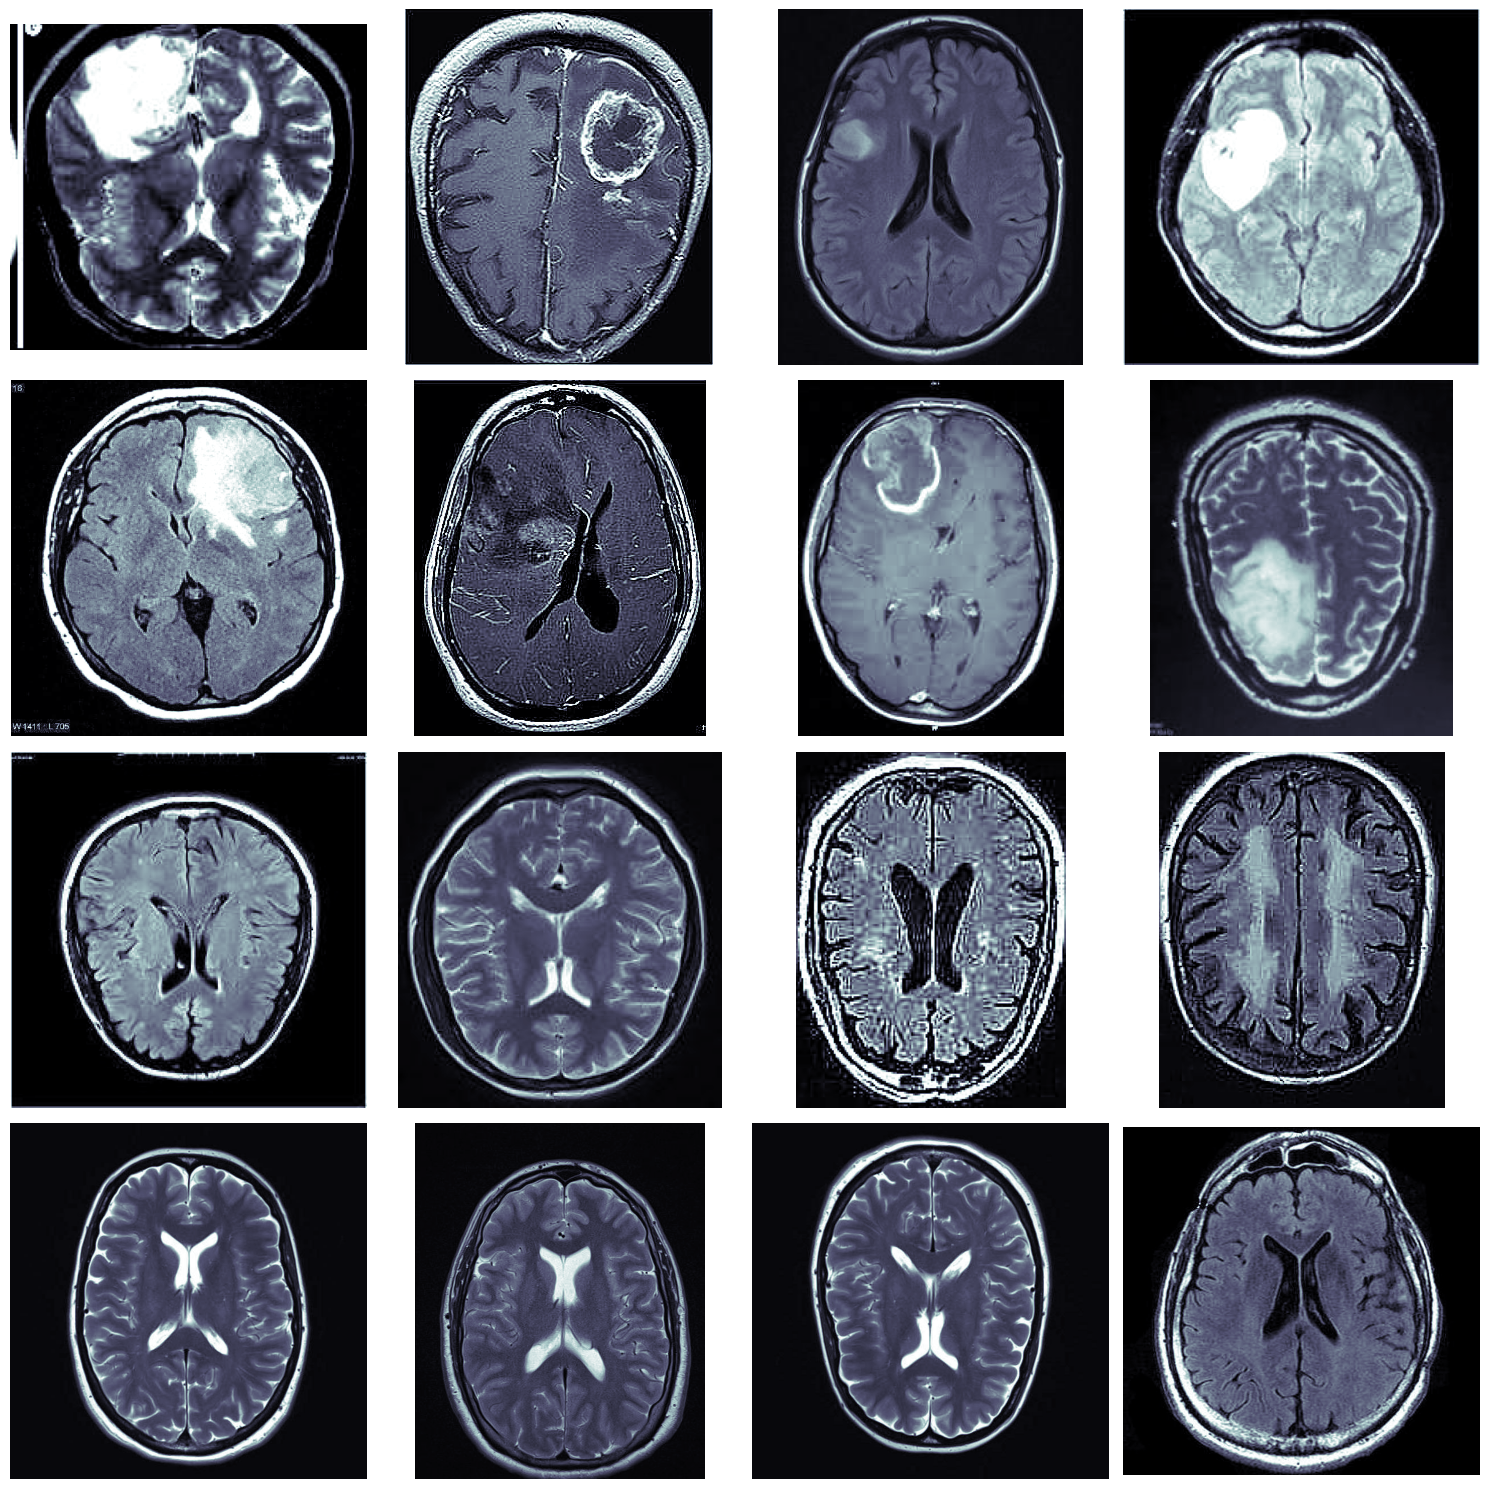

In [9]:
c_idx = 0
r_idx = 0
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
for i in range(16):
    file_name = None
    if i < 8:
        # Then load positive image
        file_name = join(pos_dir, pos_imgs[np.random.randint(0, n_pos)])
    else:
        file_name = join(neg_dir, neg_imgs[np.random.randint(0, n_neg)])
    
    tmp_img = ImageOps.grayscale(Image.open(file_name, mode='r'))
    axes[r_idx, c_idx].imshow(tmp_img, cmap="bone")
    axes[r_idx, c_idx].axis("off")
    
    if c_idx == 3:
        c_idx = 0
        r_idx += 1
    else:
        c_idx += 1
fig.tight_layout()
plt.show()

### 2.2.2 Are all the images of same shape?

#### 2.2.2.1 Comparing image sizes

Our example image is 428 x 417 pixels in size.

In [10]:
tmp_img.size

(428, 417)

Looping over the other images in the data set, we find that they are not all the same size.

In [11]:
pos_fname = join(pos_dir, pos_imgs[0])
prev_size = Image.open(pos_fname, mode='r').size

for i in range(1, len(pos_imgs)):
    pos_fname = join(pos_dir, pos_imgs[i])
    new_size = Image.open(pos_fname, mode='r').size
    if new_size != prev_size:
        print(f"The previous size was: {prev_size} while the new size is: {new_size}")
        break

The previous size was: (287, 348) while the new size is: (587, 630)


So, not all images are of same size. This needs to be addressed while creating the Pipeline. Perhaps we could use resize function in Pillow to ensure all images are resized to a common size. However, one caveat to the approach is, this approach would be fine for downscaling, and in case of upscaling, I might need to rethink about this. Although there are methods such as KNN, or other clustering techniques that can adapted to perform interpolation while resizing, there are better ways to handle this.

#### 2.2.2.2 Find the minimal size from the set of all images

In [12]:
pos_fname = join(pos_dir, pos_imgs[0])
min_size = Image.open(pos_fname, mode='r').size

for i in range(1, len(pos_imgs)):
    pos_fname = join(pos_dir, pos_imgs[i])
    new_size = Image.open(pos_fname, mode='r').size
    if new_size < min_size:
        min_size = new_size

for i in range(len(neg_imgs)):
    neg_fname = join(neg_dir, neg_imgs[i])
    new_size = Image.open(neg_fname, mode='r').size
    if new_size < min_size:
        min_size = new_size

print(f"Minimum size from the set of all images: {min_size}")

Minimum size from the set of all images: (150, 198)


## 2.3 Resizing images

We can use the `resize` function to make sure all images are all of the same size. Our example image is resized below. When creating the TensorFlow data sets, we will be able to do this resizing with built-in functions.

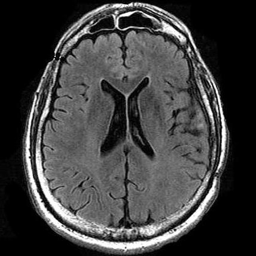

In [13]:
tmp_img.resize([256, 256])

## 2.4 Preparing the Data

### 2.4.1 Load and shuffle the images

We use a Keras API function to load in image data, assigning labels of `yes` (tumor present) and `no` (tumor absent) to each image as we do so. We build training, validation, and test data sets. This function also resizes the images as it builds the data sets. The training set has 2400 original images and the validation and test sets each have 300 images.

In [14]:
## Pipeline
#batch_size = 32
#img_size = [224, 224]

shuffle=True
batch_size = 30
img_size = [256, 256]


base_dir = 'data/archive/sets'

# Create the training set
train_dir = join(base_dir, 'train')
train_ds = keras.utils.image_dataset_from_directory(train_dir,
                                                    label_mode='binary', class_names = ['yes', 'no'],
                                                    color_mode='grayscale',
                                                    batch_size=batch_size,
                                                    image_size=img_size,
                                                    shuffle=shuffle,
                                                    seed=random_state,
                                                    validation_split=None,
                                                    interpolation='bilinear')


# Create the validation set
val_dir = join(base_dir, 'validation')
val_ds = keras.utils.image_dataset_from_directory(val_dir,
                                                  label_mode='binary', class_names = ['yes', 'no'],
                                                  color_mode='grayscale',
                                                  batch_size=batch_size,
                                                  image_size=img_size,
                                                  shuffle=shuffle,
                                                  seed=random_state,
                                                  validation_split=None,
                                                  interpolation='bilinear')

# Create the test set
test_dir = join(base_dir, 'test')
test_ds = keras.utils.image_dataset_from_directory(test_dir,
                                                   label_mode='binary', class_names = ['yes', 'no'],
                                                   color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   image_size=img_size,
                                                   shuffle=shuffle,
                                                   seed=random_state,
                                                   validation_split=None,
                                                   interpolation='bilinear')



Found 2400 files belonging to 2 classes.
Found 300 files belonging to 2 classes.
Found 300 files belonging to 2 classes.


In [15]:
train_files = set(listdir(join(train_dir, 'yes')))
val_files = set(listdir(join(val_dir, 'yes')))
test_files = set(listdir(join(test_dir, 'yes')))

In [16]:
train_files.intersection(val_files)

set()

In [17]:
train_files.intersection(test_files)

set()

### 2.4.2 Data Augmentation

We have 2400 original training images. These are all evenly split between tumor and non-tumor images. We decided to use data augmentation to increase the size of our data set as well as provide different looks to the model to help it better identify the images correctly. We can create an augmentation pipeline to be applied at the beginning of the model.

We assume that the image features that can be changed, to increase the difficulty of prediction, are brightness and contrast.  By observing the brain images, a brain image looks symmetrical. It is made of black and white as the main picture color, and different degrees of black and white distribution form various forms of areas, shapes, lines etc. Thus, to obtain more observations for our model, we are going to do data augmentation based on our observation of the image features. The methods we chose are random flipping, change the brightness and contrast of the images.

We create an augmentation pipeline, passing the different types of augmentation we want to perform. We also added in a small amount of random noise to the pixel data. We only augment the training data, so that our validation and testing is being done only with original images.

In [18]:
data_augmentation = tf.keras.Sequential([
  RandomFlip(mode='horizontal', seed=random_state),
  #RandomRotation(factor=[-0.5, 0.5], fill_mode='constant', fill_value=0, interpolation='bilinear'),
  RandomBrightness(factor=[0, 0.3], value_range=[0, 1.], seed=random_state),
  RandomContrast(factor=[0, 0.3], seed=random_state),
  GaussianNoise(stddev=tf.math.sqrt(0.05), seed=random_state)
])

In [19]:
# new_train = new_train.map(lambda x, y: (data_augmentation(x, training=True), y), 
#                 num_parallel_calls=tf.data.experimental.AUTOTUNE)

### 2.4.3 Prefetch for training

We prefetch the data so that the model will always have data ready to go each round of training. This improves the efficency of the training process saves more memory space.

In [20]:
buffer_size=2

# prefetch the training data
new_train = train_ds.prefetch(buffer_size)

# prefetch the validation data
new_val = val_ds.prefetch(buffer_size)

# prefetch the test data
new_test = test_ds.prefetch(buffer_size)

We observe that the training data set is a prefetchDataset TensorFlow object.

In [21]:
new_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

## 2.5 Building our Own Model

We want to see how building our own model compares against using a pre-trained model.

### 2.5.1 Model Architecture

We create a simple convolusion deep neural network, that does rescaling and data augmentation as layers in the model. After each convolusion layer, we use batch normalization to deal with overfitting and max pooling to reduce the complexity of the model and speed up the training process. Our output layer uses 'sigmoid' for its activation, as we have binary classified data.

In [22]:
model_own = Sequential([
                InputLayer(input_shape=[256, 256, 1], batch_size=batch_size),
                Rescaling(1./255),
                data_augmentation,
                BatchNormalization(),
                Conv2D(filters=32, kernel_size=5, activation='relu'), # 252x252
                MaxPool2D(), # 126x126
                BatchNormalization(),
                Conv2D(filters=64, kernel_size=3, activation='relu'), # 124x124
                MaxPool2D(), # 62x62
                BatchNormalization(),
                Conv2D(filters=128, kernel_size=3, activation='relu'), # 60x60
                MaxPool2D(), # 30x30
                BatchNormalization(),
                Flatten(),
                Dense(128, activation='relu'),
                BatchNormalization(),
                Dense(10, activation='relu'),
                BatchNormalization(),
                Dense(1, activation='sigmoid')
            ])

In [23]:
model_own.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (30, 256, 256, 1)         0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 1)       0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 1)      4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 252, 252, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 126, 126, 32)    

### 2.5.2 Setting our own model callbacks

We identify the directory to store our model checkpoints, only saving a model and its weights if they are the best we have seen so far. We also setup Power Scheduling to adjust our learning rate to deal with the vanishing/eploding gradient problem. An Early Stopping callback protects against overfitting.

In [24]:
# Where to store the best model and its weights
model_path='data/archive/results/model_own/'

# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=model_path + '/model.own',
                                                      save_best_only=True,
                                                      save_weights_only=True)
# ReduceLROnPlateau callback
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_accuracy',
                factor=0.1,
                patience=10,
                verbose=1,
                mode='max',
                min_delta=0.0001,
                min_lr=1e-7
             )

# NaN callback
terminate_nan_cb = tf.keras.callbacks.TerminateOnNaN()

# Early Stopping Callback
es_cb = tf.keras.callbacks.EarlyStopping(
                        monitor='val_accuracy',
                        min_delta=1e-4,
                        patience=10,
                        verbose=1,
                        mode='max',
                        restore_best_weights=True,
                        start_from_epoch=0
                    )

## 2.5.3 Custom functions for evaluation

This custom function that calculates macro F1 will be used for evaluation purposes in addition to accuracy.

In [25]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
        r_pos = true_positives / (possible_positives + K.epsilon())
        r_neg = true_negatives / (possible_negatives + K.epsilon())
        return 0.5 * (r_pos + r_neg)

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        true_negatives = K.sum(K.round(K.clip(1-y_true * 1-y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        predicted_negatives = K.sum(K.round(K.clip(1-y_pred, 0, 1)))
        p_pos = true_positives / (predicted_positives + K.epsilon())
        p_neg = true_negatives / (predicted_negatives + K.epsilon())
        return 0.5 * (p_pos + p_neg)
    
    p_macro = precision(y_true, y_pred)
    r_macro = recall(y_true, y_pred)
    return 2*((p_macro*r_macro)/(p_macro+r_macro+K.epsilon()))

### 2.5.4 Compiling our own model

In [26]:
model_own.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy', f1])

### 2.5.5 Training our own Model

We will train our own model through 20 epochs. We observe that the model quite quickly reaches a very high accuracy with the validation data.

In [27]:
history_own = model_own.fit(new_train,
                            batch_size=batch_size,
                            epochs=20,
                            verbose=1,
                            validation_data=new_val,
                            workers=16,
                            use_multiprocessing=True,
                            callbacks=[lr_schedule,
                                       terminate_nan_cb,
                                       es_cb,
                                       model_checkpoint_cb]
                    )

Epoch 1/20
80/80 [==============================] - 91s 1s/step - loss: 0.4260 - accuracy: 0.8092 - f1: 0.8127 - val_loss: 1.0372 - val_accuracy: 0.5000 - val_f1: 0.3322 - lr: 0.0010
Epoch 2/20
80/80 [==============================] - 88s 1s/step - loss: 0.1851 - accuracy: 0.9438 - f1: 0.9452 - val_loss: 0.4988 - val_accuracy: 0.8867 - val_f1: 0.8929 - lr: 0.0010
Epoch 3/20
80/80 [==============================] - 90s 1s/step - loss: 0.0867 - accuracy: 0.9762 - f1: 0.9766 - val_loss: 0.1710 - val_accuracy: 0.9467 - val_f1: 0.9486 - lr: 0.0010
Epoch 4/20
80/80 [==============================] - 87s 1s/step - loss: 0.0572 - accuracy: 0.9867 - f1: 0.9864 - val_loss: 0.0828 - val_accuracy: 0.9800 - val_f1: 0.9796 - lr: 0.0010
Epoch 5/20
80/80 [==============================] - 88s 1s/step - loss: 0.0416 - accuracy: 0.9875 - f1: 0.9876 - val_loss: 0.1169 - val_accuracy: 0.9433 - val_f1: 0.9462 - lr: 0.0010
Epoch 6/20
80/80 [==============================] - 87s 1s/step - loss: 0.0263 - accu

### 2.5.6 Evaluating our own Model

Since we used a model checkpoint to store the best verion of the model trained so far, we are able to reload the best version's weights. We observe that the model has an accuracy of 0.93 and a macro F1 of 0.9344 on the test data.

In [28]:
model_own.load_weights(filepath= model_path + '/model.own')
loss, accuracy, f1_score = model_own.evaluate(new_test)

10/10 [==============================] - 2s 174ms/step - loss: 0.2317 - accuracy: 0.9333 - f1: 0.9377


### 2.5.7 Plotting performance of our model

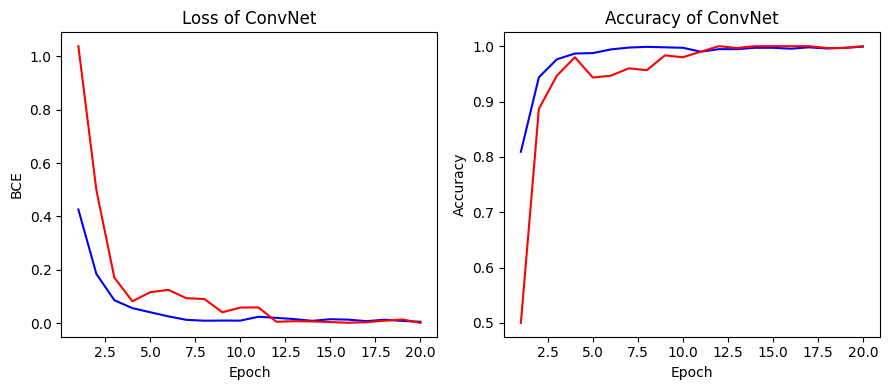

In [29]:
plot_performance(history_own.history, 'ConvNet')

## 2.6 Using the pretrained model, EfficentNetV2B2

### 2.6.1 loading the pretrained model

EfficentNetV2B2 can take images of any size and with three input channels. EfficientNetV2B2 includes a pre-processing step at the start of the model, so we don't need to explicitly run a function or add a layer to do this. It will be able to take our grayscale images with one input channel and convert it to the format the model is expecting. 

We don't include the top layers of the model, as we want to tailor the predictions to our data. Instead, we will add our own top layers.  Additionally, this model has the option to include a pooling layer before we add our own layers, so we also do not need to explicitly add a pooling layer. Here, we choose a global average pooling layer.

In [30]:
# setting the color channel to grayscale
img_shape = img_size + [3,]

# instantiating the model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B2(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    pooling='avg',
    include_preprocessing=True
)

### 2.6.2 Freezing the pre-trained layers

We observe that the pre-trained model has no trainable parameters, as all its layers are frozen.

In [31]:
# freeze all pre-trained layers
base_model.trainable = False

# observe the layers and trainable parameters
base_model.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 256, 256, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 256, 256, 3)  0           ['rescaling_1[0][0]']            
                                                                                                  
 stem_conv (Conv2D)             (None, 128, 128, 32  864         ['normalization[0

### 2.6.3 Building the training pipeline

#### 2.6.3.1 Preparing new layer types

In [32]:
# add a resize layer so that there are RGB channels (3) instead of just grayscale (1)
# we would need this if uing Resnet but not for EfficentNetV2B2
#resize = Conv2D(3,(3,3), padding='same')

# add the pre-processing layer
# we would need this if uing Resnet but its included for for EfficentNetV2B2
#preprocess_input = tf.keras.applications.resnet.preprocess_input


# add a global average pooling layer
# we would need this if uing Resnet but its included for for EfficentNetV2B2
#global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

# add a flattening layer
flatten = Flatten()

# add a dense layer
dense1 = Dense(128, activation='relu')
dense2 = Dense(10, activation='relu'),

# add Dropout layer
dropout2 = keras.layers.Dropout(0.2)
dropout4 = keras.layers.Dropout(0.4)

# add an output layer
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')

#### 2.6.3.2 Add layers on top of pre-trained model

Here we will add a flattening layer, as well as a dense layer, and a dropout layer. These layers help tune the predictions to fit our data. Finally, we add an output layer using the sigmoid activation so that we can do binary classification.

In [33]:
inputs = tf.keras.Input(shape=(256, 256, 1))
x = base_model(inputs, training=False)
x = flatten(x)
x = dense1(x) 
x = dropout4(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

### 2.6.4 Compile the full model

We compile the model with the Adam optomizer, setting a starting learning rate of 0.001 which is good practice. Since we are dealing with only two classes, we set the loss to binary crossentropy. Finally, we use the accuracy metric, as well as the macro F1 metric to evaluate how the training process. WE observe that we now have over 180K parameters to train. These parameters all come from our added layers, as the pre-trained layers are still frozen.

In [34]:
# set the starting learning rate
base_learning_rate = 0.001

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

# view the full model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 1408)             8769374   
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1408)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               180352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                             

### 2.6.5 Modify model callbacks

We modify the callbacks to be more sensitive to lack of model improvement as we train our added layers. Our Earl Stopping patientce parameters is reduced from 10 to 5. Our Power Scheduling patience parameter is reduced to 3.

In [35]:
model_path='data/archive/results/model_pretrained/'

# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=model_path + '/model.pretrained',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  min_delta=1e-4,
                                                  patience=5,
                                                  verbose=1,
                                                  mode='max',
                                                  restore_best_weights=True,
                                                  start_from_epoch=0)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                            min_delta=1e-4,
                                                            min_lr=1e-7,
                                                            patience=3,
                                                            factor=0.1,
                                                            verbose=1,
                                                            mode='max')

### 2.6.6 Train the added layers

With the pre-trained layers frozen, we run the model to train the added layers for 20 epochs and make predictions on our data specifically. We observe that, quite quickly, the model achieve a high accuracy and macro F1.

In [36]:
initial_epochs = 20

history_eff = model.fit(new_train,
                    batch_size=batch_size,
                    epochs=initial_epochs,
                    verbose=1,
                    validation_data=new_val,
                    workers=16,
                    use_multiprocessing=True,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/20
80/80 [==============================] - 70s 812ms/step - loss: 0.2777 - accuracy: 0.8842 - f1: 0.8865 - val_loss: 0.1733 - val_accuracy: 0.9400 - val_f1: 0.9417 - lr: 0.0010
Epoch 2/20
80/80 [==============================] - 64s 797ms/step - loss: 0.1319 - accuracy: 0.9533 - f1: 0.9535 - val_loss: 0.0999 - val_accuracy: 0.9600 - val_f1: 0.9603 - lr: 0.0010
Epoch 3/20
80/80 [==============================] - 64s 797ms/step - loss: 0.0854 - accuracy: 0.9746 - f1: 0.9747 - val_loss: 0.0794 - val_accuracy: 0.9733 - val_f1: 0.9732 - lr: 0.0010
Epoch 4/20
80/80 [==============================] - 64s 797ms/step - loss: 0.0611 - accuracy: 0.9825 - f1: 0.9825 - val_loss: 0.0453 - val_accuracy: 0.9867 - val_f1: 0.9864 - lr: 0.0010
Epoch 5/20
80/80 [==============================] - 64s 798ms/step - loss: 0.0503 - accuracy: 0.9829 - f1: 0.9829 - val_loss: 0.0375 - val_accuracy: 0.9833 - val_f1: 0.9839 - lr: 0.0010
Epoch 6/20
80/80 [==============================] - 63s 792ms/step - l

### 2.6.7 Unfreeze the pre-trained layers

#### 2.6.7.1 Determine the number of layers and select which to unfreeze

Now that our top layers our trained to predict for our data specifically, we want to fine tune the model. We unfreeze some number of the pre-trained model's layers. In this case, we unfreeze the top 75 layers of the 350 layers that the pre-trained model has. We will retrain the model with the weights of these top layers now being modifiable.

In [37]:
# number of layers in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 275

# Freeze all the layers before the `fine_tune_at` layer
base_model.trainable = True

for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

print("Number of layers that will be unfrozen for training: ", len(base_model.layers)-fine_tune_at)

Number of layers in the base model:  350
Number of layers that will be unfrozen for training:  75


#### 2.6.7.2 Re-compile the unfrozen model

Whenever we make some changes to the model, we need to recompile the model for those changes to take effect. As we do so, we also reduce the learning rate of the optomizer by a factor of 10. We do this so that as the model trains the newly unfrozen layers, we don't loose all the work we did training the added layers from the previous step.

In [38]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10),
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

# view the full model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 1408)             8769374   
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1408)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               180352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                             

### 2.6.8 Train the unfrozen model

We add 20 epochs for fine tuning. We also create a new history variable, so that we can track the progress of the model through all the different training steps. We observe that the model achieves over 0.99 accuracy and macro F1 in the validation data.

In [39]:
# Additional number of epochs
fine_tune_epochs = 20
total_epochs =  history_eff.epoch[-1]+1 + fine_tune_epochs

# run the training, starting at the next epoch
history_fine_tune = model.fit(new_train,
                    batch_size=batch_size,
                    epochs=total_epochs,
                    initial_epoch=history_eff.epoch[-1]+1,
                    verbose=1,
                    validation_data=new_val,
                    workers=16,
                    use_multiprocessing=True,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 13/32
80/80 [==============================] - 96s 1s/step - loss: 0.0319 - accuracy: 0.9892 - f1: 0.9893 - val_loss: 0.0109 - val_accuracy: 1.0000 - val_f1: 1.0000 - lr: 1.0000e-04
Epoch 14/32
80/80 [==============================] - 86s 1s/step - loss: 0.0136 - accuracy: 0.9950 - f1: 0.9949 - val_loss: 0.0088 - val_accuracy: 0.9967 - val_f1: 0.9967 - lr: 1.0000e-04
Epoch 15/32
80/80 [==============================] - 86s 1s/step - loss: 0.0057 - accuracy: 0.9983 - f1: 0.9984 - val_loss: 0.0186 - val_accuracy: 0.9900 - val_f1: 0.9902 - lr: 1.0000e-04
Epoch 16/32
80/80 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9996 - f1: 0.9996
Epoch 16: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
80/80 [==============================] - 88s 1s/step - loss: 0.0033 - accuracy: 0.9996 - f1: 0.9996 - val_loss: 0.0038 - val_accuracy: 1.0000 - val_f1: 1.0000 - lr: 1.0000e-04
Epoch 17/32
80/80 [==============================] - 89s 1s/step - loss: 0.

### 2.6.9 Evaluate the unfrozen model

We reload the wieghts from the best version of the model.

In [40]:
model.load_weights(filepath= model_path + '/model.pretrained')

Using the best version of the model, we test it on the test data. The accuracy of the model on the test data is 0.9233. The macro F1 score for the model on the test data is 0.9235.

In [41]:
loss, accuracy, f1_score = model.evaluate(new_test)

10/10 [==============================] - 8s 797ms/step - loss: 0.3162 - accuracy: 0.9433 - f1: 0.9403


### 2.6.10 Plot training performance of pretrained model

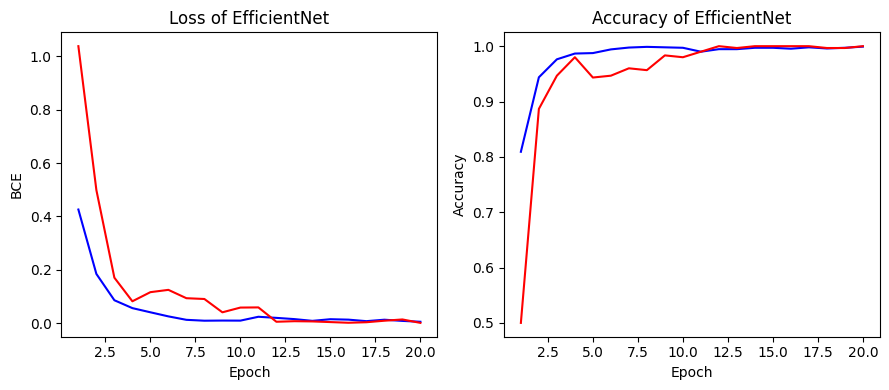

In [42]:
plot_performance(history_own.history, 'EfficientNet')

## 2.7 Building or own Residual Network

### 2.7.1 Model Architecture

In [43]:
def conv(x, filters, kernel_size=3, activation='selu', downsample=False):
    padding = 'same'
    if downsample:
        padding = 'valid'
    x = BatchNormalization()(x)
    return Conv2D(filters=filters, kernel_size=kernel_size, \
                  padding=padding, activation=activation)(x)

In [44]:
def res_block(x, filters):
    input_depth = x.shape[-1]
    y = LayerNormalization()(x)
    y = BatchNormalization()(y)
    y = Conv2D(filters=input_depth//2, kernel_size=1, activation='selu', padding='same')(y)
    y = LayerNormalization()(y)
    y = BatchNormalization()(y)
    y = Conv2D(filters=input_depth//2, kernel_size=3, activation='selu', padding='same')(y)
    y = LayerNormalization()(y)
    y = BatchNormalization()(y)
    y = Conv2D(filters=input_depth, kernel_size=1, activation='selu', padding='same')(y)
    return Add()([y, x])

In [45]:
def conv_block(x, filters, kernel_size=3):
    y = LayerNormalization()(x)
    y = conv(x=y, kernel_size=kernel_size, filters=filters, downsample=True)
    y = conv(x=y, kernel_size=kernel_size, filters=filters, downsample=True)
    y = AveragePooling2D()(y)
    return y

In [46]:
np.sqrt(0.05)

0.22360679774997896

### 2.7.2 Setting up layers

In [47]:
x2 = Input(shape=[256, 256, 1], batch_size=None, dtype=tf.float32)

#---------------------------------------------
#-----------PREPROCESSING---------------------
y2 = Rescaling(scale=1./255)(x2)

#-----------DATA AUGMENTATION-----------------
y2 = RandomFlip(mode='horizontal', seed=random_state)(y2)
y2 = RandomBrightness(factor=[0, 0.3], value_range=[0, 1.], seed=random_state)(y2)
y2 = RandomContrast(factor=[0, 0.3], seed=random_state)(y2)
y2 = GaussianNoise(stddev=tf.math.sqrt(0.05), seed=random_state)(y2)
#---------------------------------------------

y2 = conv(y2, filters=32, kernel_size=7, downsample=True) # 250x250x32
y2 = AveragePooling2D()(y2) # 125x125x32

# 1st block - 6 layers
for i in range(3):
    y2 = res_block(y2, filters=32)  # 125x125x32

# 2nd block - 8 layers
y2 = conv_block(y2, filters=64) # 60x60x64
for i in range(3):
    y2 = res_block(y2, filters=64) # 60x60x64

# 3rd block - 12 layers
y2 = conv_block(y2, filters=128) # 28x28x128
for i in range(5):
    y2 = res_block(y2, filters=128) # 28x28x128

# 4th block - 6 layers
y2 = conv_block(y2, filters=256) # 24x24x256
for i in range(2):
    y2 = res_block(y2, filters=256) # 12x12x256
    
# so far 33 layers
y2 = conv_block(y2, filters=128) # 4x4x128 # Now 35 layers
y2 = BatchNormalization()(y2)
y2 = Conv2D(filters=32, kernel_size=4, padding='valid', activation='selu')(y2)
y2 = Flatten()(y2)
y2 = BatchNormalization()(y2)
y2 = Dense(10, activation='selu')(y2)
y2 = BatchNormalization()(y2)
y2 = Dense(1, activation='sigmoid')(y2)

resnet = keras.Model(inputs=[x2], outputs=[y2])
resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 256, 256, 1)  0           ['input_4[0][0]']                
                                                                                                  
 random_flip_1 (RandomFlip)     (None, 256, 256, 1)  0           ['rescaling_2[0][0]']            
                                                                                                  
 random_brightness_1 (RandomBri  (None, 256, 256, 1)  0          ['random_flip_1[0][0]']    

### 2.7.3 Compile Model

In [48]:
resnet.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
               loss='binary_crossentropy', metrics=['accuracy', f1])

#### 2.7.4 Set Callbacks

In [49]:
lr_schedule2 = tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_f1',
                factor=0.1,
                patience=2,
                verbose=1,
                mode='max',
                min_delta=0.0001,
                min_lr=1e-7
             )

model_checkpoint_cb2 = keras.callbacks.ModelCheckpoint(filepath=model_path + '/model.resnet',
                                                      monitor='val_f1',
                                                      mode='max',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# Early Stopping Callback
es_cb2 = tf.keras.callbacks.EarlyStopping(
                        monitor='val_f1',
                        min_delta=1e-4,
                        patience=10,
                        verbose=1,
                        mode='max',
                        restore_best_weights=True,
                        start_from_epoch=0
                    )

### 2.7.5 Train Residual Network

In [50]:
resnet_history = resnet.fit(new_train,
                            batch_size=batch_size,
                            epochs=200,
                            verbose=1,
                            validation_data=new_val,
                            workers=16,
                            use_multiprocessing=True,
                            callbacks=[lr_schedule2,
                                       terminate_nan_cb,
                                       es_cb2,
                                       model_checkpoint_cb]
                         )

Epoch 1/200
80/80 [==============================] - 565s 7s/step - loss: 0.4695 - accuracy: 0.7775 - f1: 0.7825 - val_loss: 0.6081 - val_accuracy: 0.7467 - val_f1: 0.7603 - lr: 1.0000e-04
Epoch 2/200
80/80 [==============================] - 549s 7s/step - loss: 0.2965 - accuracy: 0.8825 - f1: 0.8852 - val_loss: 0.3047 - val_accuracy: 0.8800 - val_f1: 0.8716 - lr: 1.0000e-04
Epoch 3/200
80/80 [==============================] - 545s 7s/step - loss: 0.1741 - accuracy: 0.9421 - f1: 0.9434 - val_loss: 0.3092 - val_accuracy: 0.8633 - val_f1: 0.8739 - lr: 1.0000e-04
Epoch 4/200
80/80 [==============================] - 549s 7s/step - loss: 0.1393 - accuracy: 0.9617 - f1: 0.9622 - val_loss: 0.4085 - val_accuracy: 0.8433 - val_f1: 0.8504 - lr: 1.0000e-04
Epoch 5/200
80/80 [==============================] - 547s 7s/step - loss: 0.1140 - accuracy: 0.9600 - f1: 0.9608 - val_loss: 0.2610 - val_accuracy: 0.8733 - val_f1: 0.8783 - lr: 1.0000e-04
Epoch 6/200
80/80 [==============================] - 54

### 2.7.6 Evaluate model

In [51]:
resnet.evaluate(new_test)

10/10 [==============================] - 18s 2s/step - loss: 0.1604 - accuracy: 0.9467 - f1: 0.9496


[0.16036665439605713, 0.9466666579246521, 0.9496307373046875]

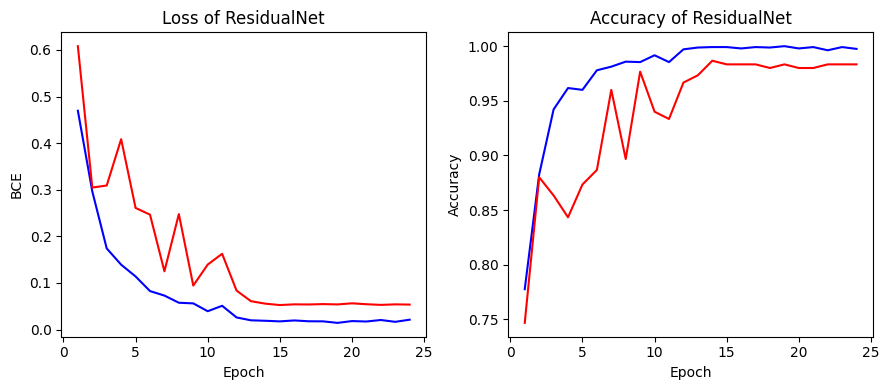

In [52]:
plot_performance(resnet_history.history, 'ResidualNet')

## 2.8 Totally New Image Data

### 2.8.1 Load new brain scan images

We load another group of brain image data to test the two models created on our own and the model built using transfer learning on totally new data. These images are also brain scan images. Most of them are from the same top-down perspective, but some are from the back or sides. 

In [53]:
batch_size = 30
img_size = [256, 256]

base_dir = 'data/archive/sets/special'


# Create the test set
#test_dir = join(base_dir, 'test')
test_ds = keras.utils.image_dataset_from_directory(base_dir,
                                                 label_mode='binary', class_names = ['yes', 'no'],
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 image_size=img_size,
                                                 shuffle=True,
                                                 seed=random_state,
                                                 validation_split=None,
                                                 interpolation='bilinear')

buffer_size=2
totally_new_test = test_ds.prefetch(buffer_size)

Found 1290 files belonging to 2 classes.


### 2.8.2 Evaluate our first model

The first model we built, a convolusion network with batch normaliztion, performs reasonable well, with an accuracy of 0.7907 and a macro F1 of 0.799. However, this is quite a bit worse than this model scored with the test data from the previous data sets, with which it scored an accuracy of 0.93 and a macro F1 of 0.9344.

In [54]:
model_own.evaluate(totally_new_test)

43/43 [==============================] - 9s 217ms/step - loss: 1.2304 - accuracy: 0.7403 - f1: 0.7628


[1.2303905487060547, 0.7403100728988647, 0.7627605199813843]

### 2.8.3 Evaluate our second model

The second model we built, a residual network, did not do so well with this new image data, having an accuracy of 0.6116 and a macro F1 of 0.6981. This is much reduced compared to this model's performance with the test data from our previous data sets, with which it scored an accuracy of 0.9400 and a macro F1 of 0.9432.

In [55]:
resnet.evaluate(totally_new_test)

43/43 [==============================] - 83s 2s/step - loss: 0.9614 - accuracy: 0.6178 - f1: 0.6876


[0.9614129066467285, 0.617829442024231, 0.68757563829422]

### 2.8.4 Evalute our pretrained model

The model we built using transfering learning with the EfficientNetV2B2 pretrained model was very robust in handling this totally new data. It had an accuracy of 0.9527 and a macro F1 of 0.9432, which was a slight increase over the performance with the test data from our previous data sets, with which it scored an accuracy of 0.9233 and a macro F1 of 0.9235.

In [56]:
model.evaluate(totally_new_test)

43/43 [==============================] - 37s 849ms/step - loss: 0.2131 - accuracy: 0.9450 - f1: 0.9358


[0.21314793825149536, 0.9449612498283386, 0.9357995390892029]

### 2.8.5 Evaluate the pretrained model out of the box

#### 2.8.5.1 Load unaltered pretrained model

Here we restore the original version of EfficientNetV2B2.

In [57]:
# instantiating the model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B2(
    include_top=False,
    weights='imagenet',
    input_shape=img_shape,
    pooling='avg',
    include_preprocessing=True
)

# Add top layers
inputs = tf.keras.Input(shape=(256, 256, 1))
x = base_model(inputs, training=False)
x = flatten(x)
x = dense1(x) 
x = dropout4(x)
outputs = prediction_layer(x)
model_pretrained_unaltered = tf.keras.Model(inputs, outputs)

# compile the model
model_pretrained_unaltered.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy', f1])

model_pretrained_unaltered.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 efficientnetv2-b2 (Function  (None, 1408)             8769374   
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1408)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               180352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                           

#### 2.8.5.2 Evaluate unaltered pretrained model

Testing the pretrained EfficientNetV2B2 model out of the box, without having done training to tailor the model to predict for brain scan images, it still does alright in predicting whether this totally new batch of brain scans contain or do not contain tumors. The model has an accuracy of 0.8775 and a macro F1 of 0.8631. However, this is worse than the tailored model we created that used this model as its base, which scored an accuracy of 0.9527 and a macro F1 of 0.9432 on this new data.

In [58]:
model_pretrained_unaltered.evaluate(totally_new_test)

43/43 [==============================] - 39s 843ms/step - loss: 0.2685 - accuracy: 0.9016 - f1: 0.8864


[0.2684820592403412, 0.9015504121780396, 0.886358380317688]

# 3. Conclusion

## 3.1 Self-built vs. Pretrained Models

Comparing two of our own models against a model using transfer learning from a pretrained model shows the value of using transfer learning. Our own models were not as robust on novel data as the model built using tranfer learning, even though our models did as good on the original data sets test data as the pretrained model. It also highlights the importance of using good transfer learning practices to tailor the pretrained model to one's own data. Without doing so, the unaltered pretrained model was about eight percentage points worse than the tailored model. 

The difference in robustness between our models and the tailored pretrained model is most likely do to the number of images the pretrained model was trained on compared to our own models. EfficentNetV2B2 was trained on ImageNet data, which has 14 million images. We trained our models on 2400 images. The key thing to realize is that, even if one creates a model with an excellent structure, making the model robust still requires extensive training, which takes time and is expensive. One can get a high level of quality and robustness through transfer learning quickly and cheaply.

Hypothetically, we would reccomend to stakeholders to begin this work using pretrained models to build solid baselines and direct research pathways through fast testing/prototyping. From there, as we built up proper data infrastructure and developed specific investigative goals, we could begin building and training our own model(s) specific to our chosen tasks. Assuming we could gather enough brain scan data, and had the time and money to do the training, these self-built models would likely reach a point were they performed exceptionally well, even better than the pretrained one. At that time, they could be put into production for our well-defined research goals. We could continue to monitor their performance by regualary comparing the results our self-built models produced with results from pretrained models. 

## 3.2 Further Work

Amongst our original goals, we wanted to pinpoint the precise location of the tumors. We did not do that here. For further reasearch, it would be interesting to conduct semantic segmentation in order to identify the specific regions in the scans were the tumors were present. Not only could this be used for medical purposes, such as surgery, but in further research it could allow us to crop images for specific target regions, thus saving computationl cost and potentially improving the performance of the model.

In addition, we could use tools like [SHapley Additive exPlanations (SHAP)](https://shap.readthedocs.io/en/latest/) to evaluate the specific charactersistics of the pixels that represented tumors. Furthermore, we could do unsupervisored learning (clustering) on positive images to see if any novel chacteristics of different tumor types could be unearthed. Working in conjunction with a neurologist would allow us to investigate whether any findings we might make could provide insight into improving the accuracy and speed of diagnosis and the targeting of treatment options.

# 4. References

Bhuvaji, Sartaj et al (2020).  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Brain Tumor Classification (MRI)* (Version 2) [Data Set]. Kaggle.   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri?select=Training

Cancer.Net (2022, February).  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Brain Tumor: Statistics. *Cancer.Net Editorial Board.*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.cancer.net/cancer-types/brain-tumor/statistics

Filatov, Dmytro, Ghulam Nabi Ahmad Hassan Yar (2022, July 19).  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Brain Tumor Diagnosis and Classification via Pre-Trained Convolutional Neural Networks. *medRxiv*.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.medrxiv.org/content/10.1101/2022.07.18.22277779v1.full.pdf 

Kader, Isselmou Abd El, et al (2021, August 31).  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Brain Tumor Detection and Classification on MR Images by a Deep Wavelet Auto-Encoder Model [Abstract]. *MDPI*.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8471235/ 

Hamada, Ahmed (2022).  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*Br35H :: Brain Tumor Detection 2020* (Version 12) [Data Set]. Kaggle.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

Mayfield Clinic (2018, September).  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Brain tumors: an introduction. *Mayfield Certified Health Info*.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://mayfieldclinic.com/pe-braintumor.htm

TEST CHANGES ARE TO TEST_RUN BRANCH